Exemplo Fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Base de Conhecimento

C:\Users\vinicius\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


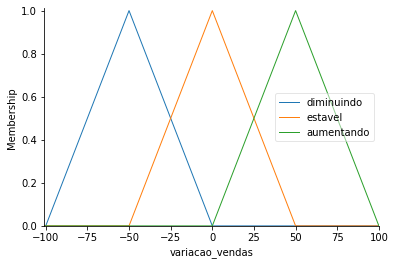

In [2]:
variacao_vendas = ctrl.Antecedent(np.arange(0, 10, 1), 'variacao_vendas')
variacao_vendas['sim'] = fuzz.trimf(variacao_vendas.universe, [0, -5, 0])
variacao_vendas['nao'] = fuzz.trimf(variacao_vendas.universe, [-50, 0 , 50])


variacao_vendas.view()
plt.show()

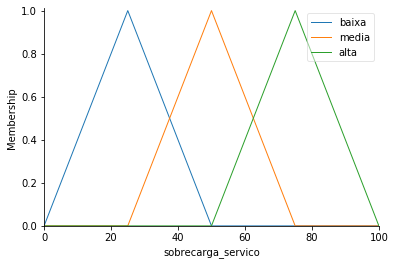

In [3]:
sobrecarga_servico = ctrl.Antecedent(np.arange(0, 101, 1), 'sobrecarga_servico')
sobrecarga_servico['baixa'] = fuzz.trimf(sobrecarga_servico.universe, [0, 25, 50])
sobrecarga_servico['media'] = fuzz.trimf(sobrecarga_servico.universe, [25, 50 , 75])
sobrecarga_servico['alta'] = fuzz.trimf(sobrecarga_servico.universe, [50, 75, 100])

sobrecarga_servico.view()
plt.show()

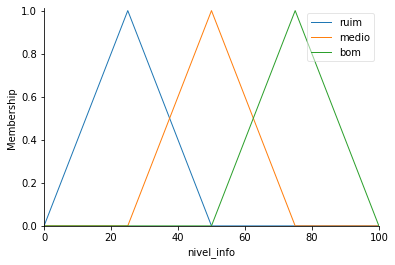

In [4]:
nivel_info = ctrl.Antecedent(np.arange(0, 101, 1), 'nivel_info')
nivel_info['ruim'] = fuzz.trimf(nivel_info.universe, [0, 25, 50])
nivel_info['medio'] = fuzz.trimf(nivel_info.universe, [25, 50 , 75])
nivel_info['bom'] = fuzz.trimf(nivel_info.universe, [50, 75, 100])

nivel_info.view()
plt.show()

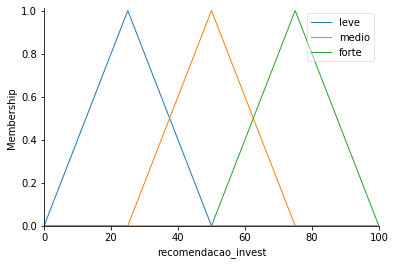

In [5]:
recomendacao_invest = ctrl.Consequent(np.arange(0, 101, 1), 'recomendacao_invest')
recomendacao_invest['leve'] = fuzz.trimf(recomendacao_invest.universe, [0, 25, 50])
recomendacao_invest['medio'] = fuzz.trimf(recomendacao_invest.universe, [25, 50 , 75])
recomendacao_invest['forte'] = fuzz.trimf(recomendacao_invest.universe, [50, 75, 100])

recomendacao_invest.view()
plt.show()

Regras Fuzzy

In [6]:
rule1 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['alta'] & nivel_info['bom'], recomendacao_invest['forte'])
rule2 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['media'] & nivel_info['bom'], recomendacao_invest['medio'])
rule3 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['baixa'] & nivel_info['bom'], recomendacao_invest['leve'])
rule4 = ctrl.Rule(variacao_vendas['aumentando'] & sobrecarga_servico['media'] & nivel_info['ruim'], recomendacao_invest['forte'])

#rule4.view()
#plt.show()

sistema de controle fuzzy

In [25]:
recomenda_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [26]:
recomenda = ctrl.ControlSystemSimulation(recomenda_ctrl)

In [27]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
recomenda.input['variacao_vendas'] = 55.0
recomenda.input['sobrecarga_servico'] = 60.0
recomenda.input['nivel_info'] = 55.0

# Crunch the numbers
recomenda.compute()

62.50000000000007


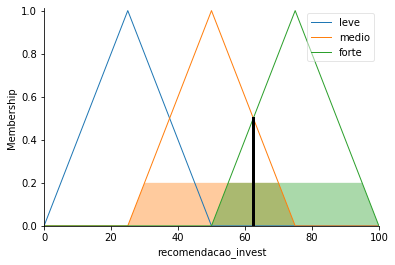

In [28]:
print(recomenda.output['recomendacao_invest'])
recomendacao_invest.view(sim=recomenda)
plt.show()